## Effects of Borrower APR Characteristics on Loans 

### Investigation Overview

In this investigation, I wanted to look at the characteristics of Borrower APR that could be used to predict their variation. The main focus was on the four variables: prosper rating, income range, stated monthly income,loan original amount,monthly payments and the listing category.

### Dataset Overview

This dataset contains 113937 observations and 81 variables/columns. The focus of this project is to communicate the findings and insights through univariate,bivariate and multivariate Exploration and built a final explanatory visual to support a storytelling.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings

warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
#Selecting variables of interest
loans = loans.iloc[:, [2, 4, 5, 7, 14, 21, 47, 49, 63, 64, 65, 67]]

In [4]:
m1 = loans[loans.StatedMonthlyIncome <= 1000000]
# ordered categorical types
loans[loans.select_dtypes(['object']).columns] = loans.select_dtypes(
    ['object']).apply(lambda x: x.astype('category'))
ordinal_var_dict = {
    'IncomeRange': [
        'Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999',
        '$50,000-74,999', '$75,000-99,999', '$100,000+'
    ],
}

for col in ordinal_var_dict:

    loans[col] = loans[col].cat.set_categories(ordinal_var_dict[col],
                                               ordered=True)

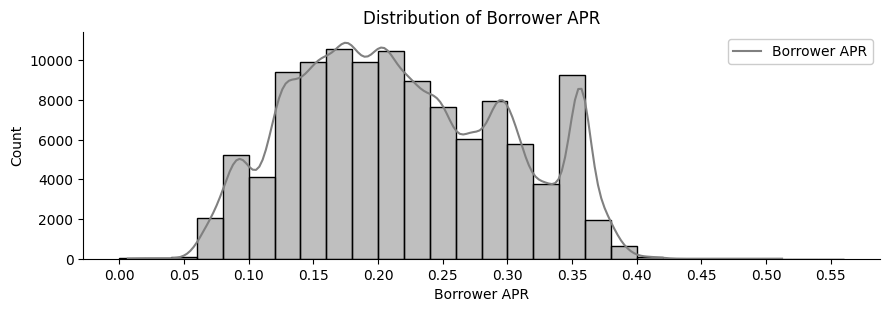

In [5]:
bins = np.arange(0, loans.BorrowerAPR.max() + 0.05, 0.02)
sns.displot(loans,
            x='BorrowerAPR',
            bins=bins,
            height=3,
            aspect=3,
            edgecolor='black',
            color='gray',
            kde='True')
x_label = np.arange(0, loans.BorrowerAPR.max() + 0.05, 0.05)
plt.xticks(x_label)
plt.legend(loc=1, ncol=1, framealpha=1, labels=['Borrower APR'])
plt.title("Distribution of Borrower APR")
plt.xlabel('Borrower APR');

* The distribution of borrower APR looks multimodal. A small peak centered at 0.10, a large peak centered at 0.18. There is also a small peak centered 0.30. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

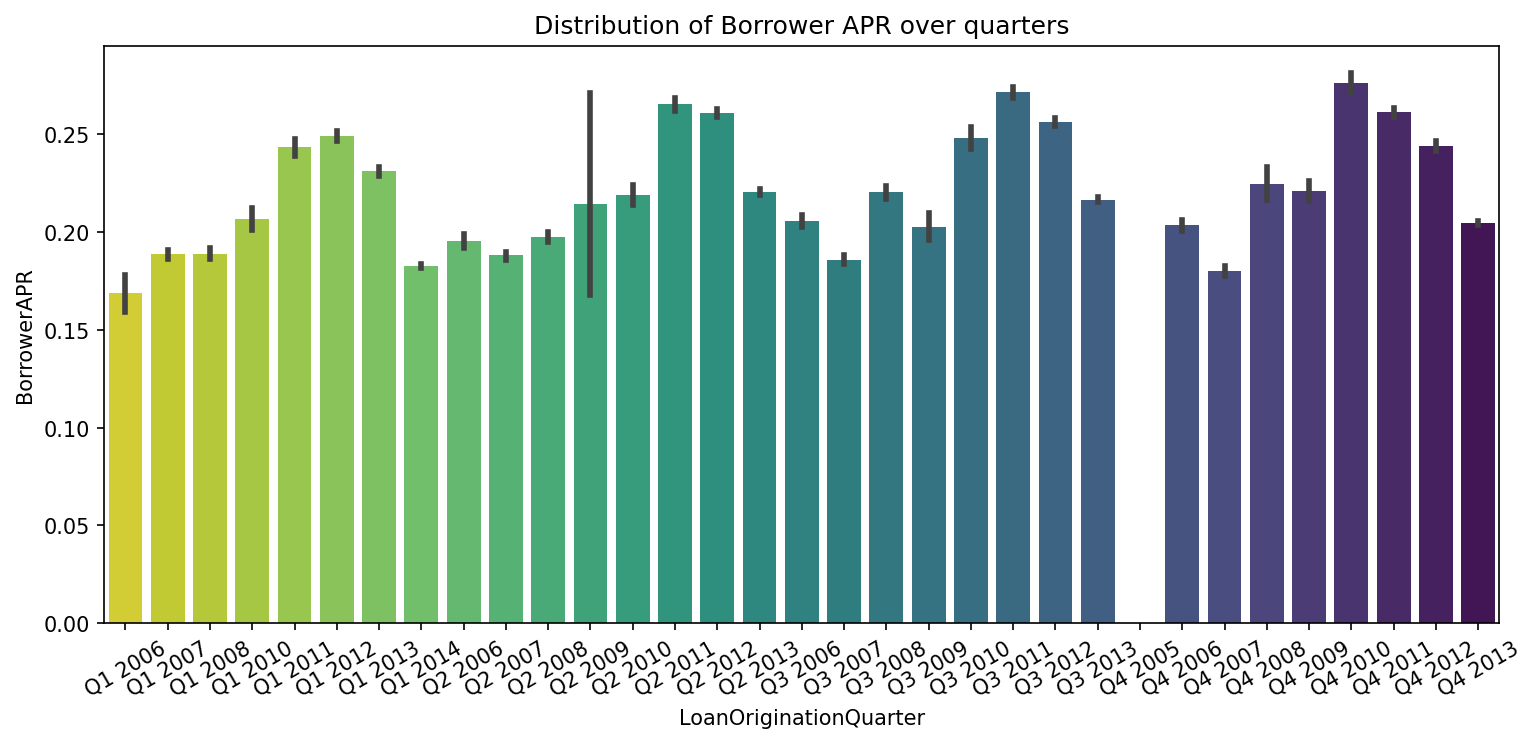

In [6]:
plt.figure(figsize=[12, 5], dpi=150)
sns.barplot(loans,
            x='LoanOriginationQuarter',
            y='BorrowerAPR',
            palette='viridis_r')
plt.xticks(rotation=30)
plt.title("Distribution of Borrower APR over quarters");

#### Borrower APR evolution over quarter of years

- Top 3  borrower rates:Q2 2010;Q3 2010;Q4 2009.
- Bottom 3 borrower rates:Q1 2006; Q1 2013;Q3 2006

* We can observe a missing data on Q1 2009, that relates to when Prosper Marketplace was making changes to its credit policy.

Source: https://en.wikipedia.org/wiki/Prosper_Marketplace

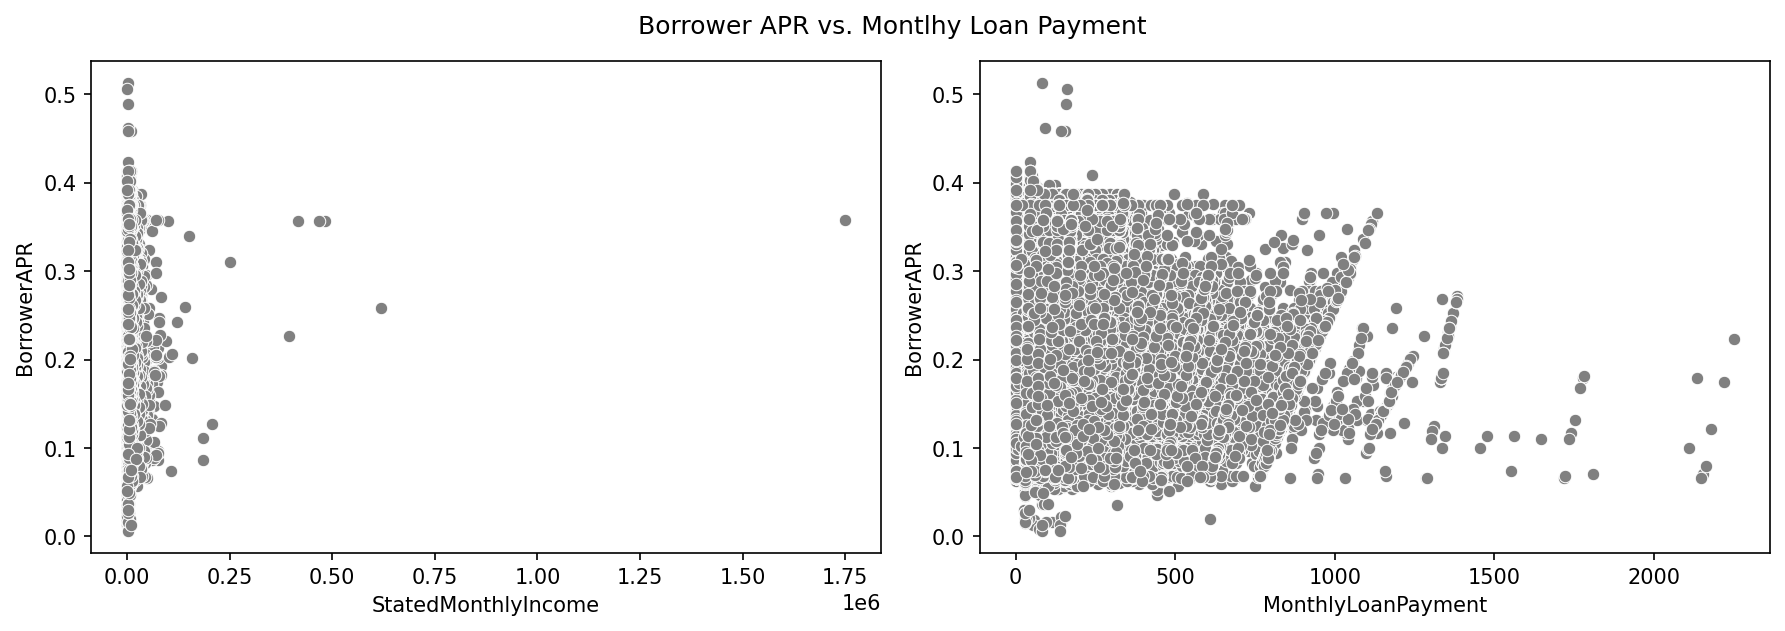

In [7]:
fig, axes = plt.subplots(1, 2, figsize=[12, 4], dpi=150)
sns.scatterplot(loans,
                y='BorrowerAPR',
                x='StatedMonthlyIncome',
                ax=axes[0],
                color='gray')
sns.scatterplot(loans,
                y='BorrowerAPR',
                x='MonthlyLoanPayment',
                ax=axes[1],
                color='gray')
plt.tight_layout()
plt.suptitle("Borrower APR vs. Montlhy Loan Payment",y=1.04);

#### Borrower APR vs. Stated Monthly Income and Monthly Loan Payments

 * Stated monthly income doesn't seem  there is a interaction  between term and borrower rating (APR), the pattern of term is similar among different months. But for original loan amount, there is a interaction between term and rating. We can see that with better Prosper rating (Alpha), the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.
  

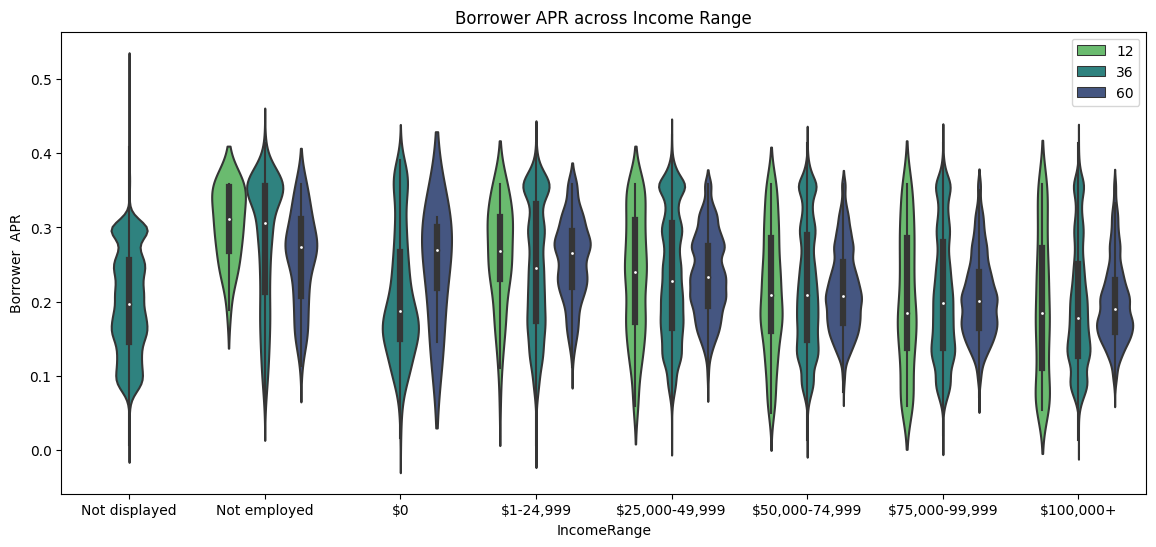

In [8]:
plt.figure(figsize=[14, 6])
sns.violinplot(x='IncomeRange',
               y='BorrowerAPR',
               data=loans,
               palette='viridis_r',
               hue='Term')
plt.title('Borrower APR across Income Range')
plt.ylabel('Borrower  APR')
plt.legend(loc='upper right');

#### Borrower APR and Income Range

*   Within each income range group, the rate increases as the term increases, but for the same term, people with higher income are able to be granted a lower interest rate.

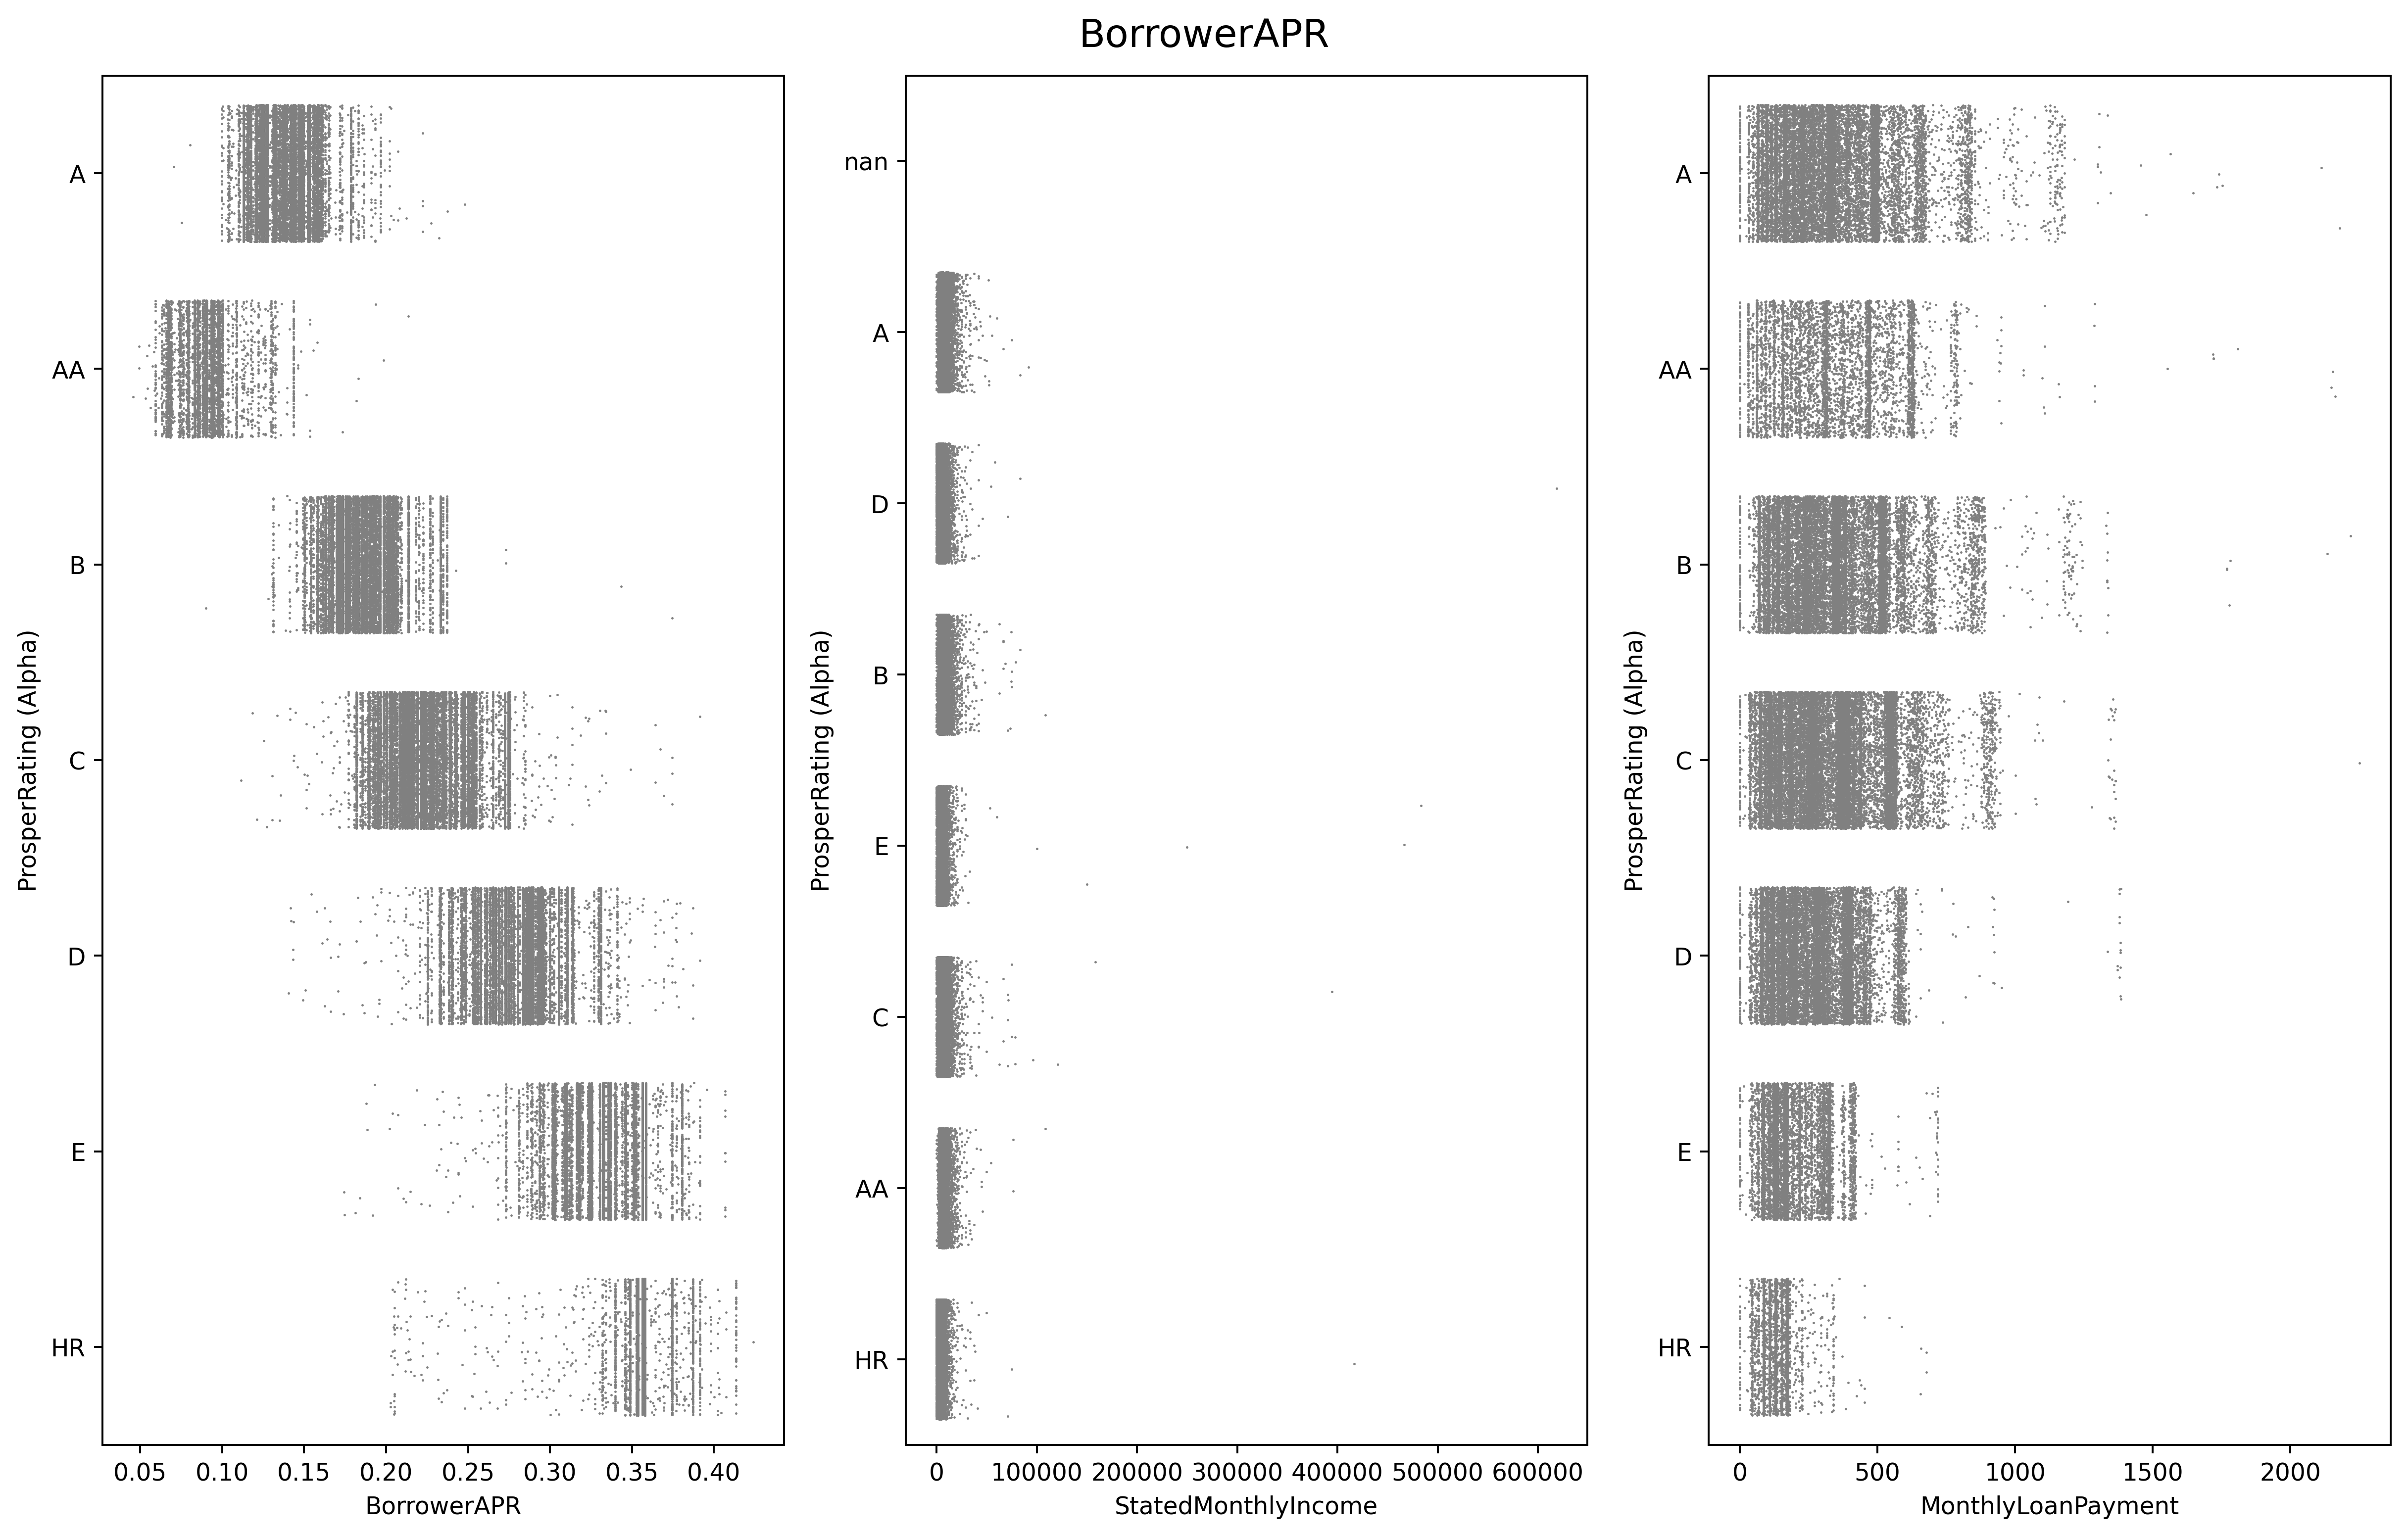

In [9]:
fig, axes = plt.subplots(1, 3, figsize=[14, 9], dpi=350)
fig.suptitle('BorrowerAPR', fontsize=16)
sns.stripplot(loans,
              y='ProsperRating (Alpha)',
              x='BorrowerAPR',
              color='gray',
              ax=axes[0],
              size=1,
              jitter=0.35,
              dodge=True,
              orient='h')
sns.stripplot(m1,
              x=m1['StatedMonthlyIncome'],
              y=m1['ProsperRating (Alpha)'],
              ax=axes[1],
              size=1,
              jitter=0.35,
              dodge=True,
              orient='h',
              color='gray')
sns.stripplot(loans,
              x='MonthlyLoanPayment',
              y='ProsperRating (Alpha)',
              ax=axes[2],
              size=1,
              jitter=0.35,
              dodge=True,
              orient='h',
              color='gray')
plt.tight_layout();

#### Prosper Rating vs. Borrower APR,Stated Monthly Income and Monthly Loan Payments 

 * Stated monthly income doesn't seem there is a interaction between term and borrower rating (APR), the pattern of term is similar among different months. But for original loan amount, there is a interaction between term and rating. We can see that with better Prosper rating (Alpha), the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

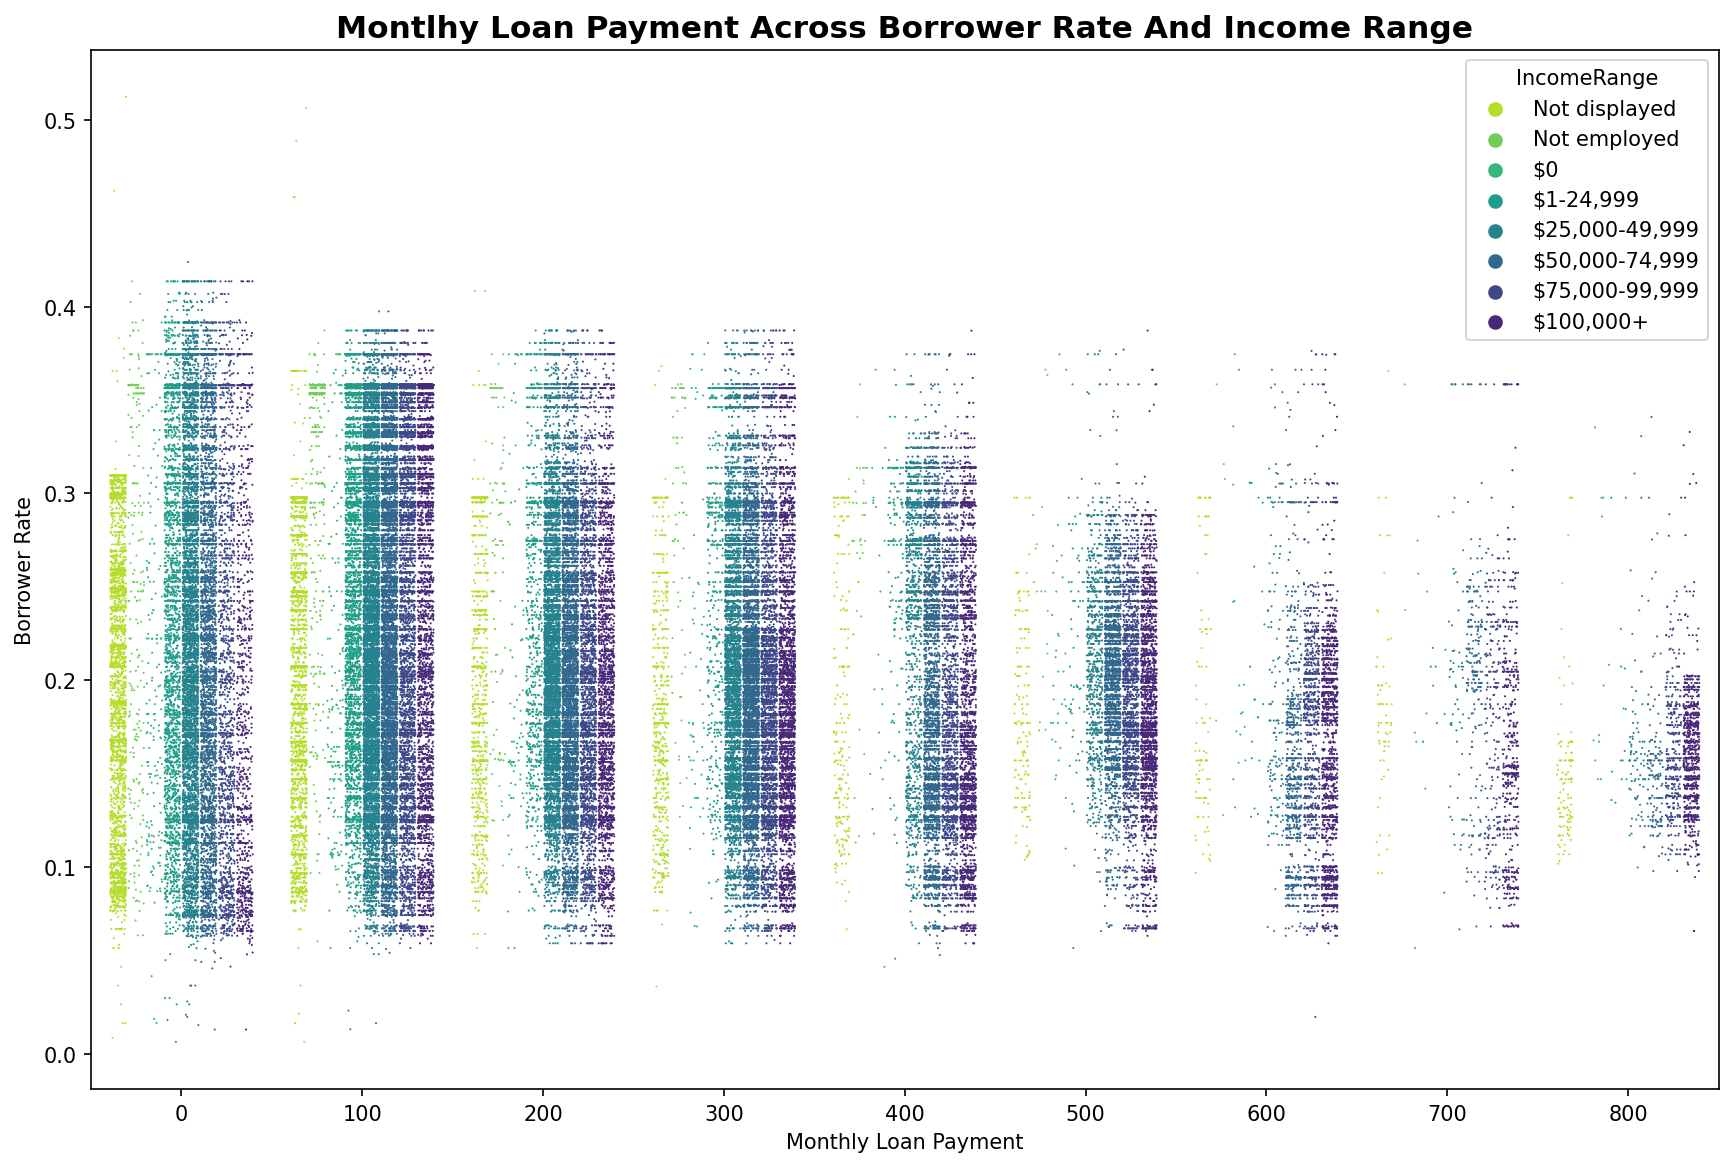

In [10]:
plt.figure(figsize=[14, 9], dpi=150)
# create intervals of 10 years using floor division(lowest integer) for MontlhyLoanPayment
data = loans.dropna(subset=['MonthlyLoanPayment']).copy()

data['MonthlyLoanPayment_int'] = ((data['MonthlyLoanPayment'] // 100) *
                                  100).astype(int)
sns.stripplot(
    data.query('MonthlyLoanPayment<MonthlyLoanPayment.quantile(0.99)'),
    x='MonthlyLoanPayment_int',
    y='BorrowerAPR',
    hue='IncomeRange',
    hue_order=None,
    order=None,
    palette='viridis_r',
    size=1,
    jitter=0.35,
    dodge=True)
plt.title('Montlhy Loan Payment across borrower rate and income range'.title(),
          fontsize=15,
          fontweight='bold')
plt.xlabel('Monthly Loan Payment'.title())
plt.ylabel('borrower rate'.title());

#### Borrower APR vs. Monthly Loan Payment and Income Range

 * The multivariate exploration showed that the relationship between borrower APR and loan amount is  negative to slightly positive when the Term increased from 12 to 60 months. I then explored the rating and term effects on loan amount, it shows that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.


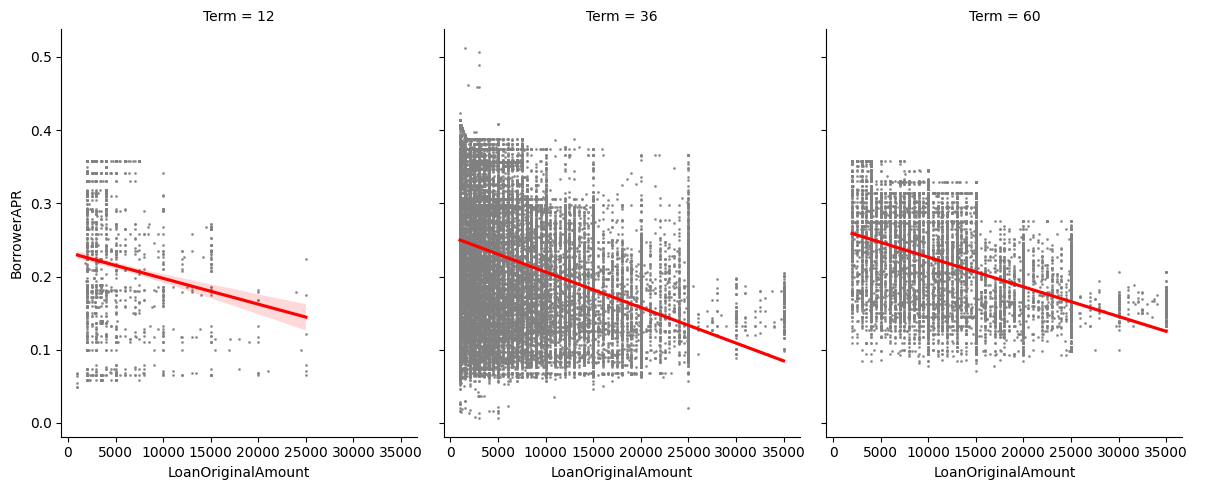

In [11]:
g = sns.FacetGrid(data=loans, aspect=0.8, height=5, col='Term', col_wrap=3)
g.map(sns.regplot,
      'LoanOriginalAmount',
      'BorrowerAPR',
      scatter_kws={
          "s": 1,
          "color": "gray"
      },
      line_kws={"color": "red"})
g.add_legend()
fig.suptitle("Borrower APR vs. Term and Original Loan Amount", fontsize=7);

####  Borrower APR vs Loan Amount and Term

* The correlation coefficient of borrower APR and loan original amount is -0.32, the scatter plot also shows that these two variables are negatively correlated, which agrees with our hypothesis, that is the more the loan amount, the lower the APR.

In [ ]:
!jupyter nbconvert Slide_Deck_Prosper_Loan_PartII.ipynb --to slides --post serve  --no-input --no-prompt


[NbConvertApp] Converting notebook Slide_Deck_Prosper_Loan_PartII.ipynb to slides
[NbConvertApp] Writing 3925931 bytes to Slide_Deck_Prosper_Loan_PartII.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Slide_Deck_Prosper_Loan_PartII.slides.html
Use Control-C to stop this server
